# Pendahuluan: Persaingan Risiko Gagal Bayar Home Credit

Supervised: Label disertakan dalam data pelatihan dan tujuannya adalah melatih model untuk belajar memprediksi label dari fitur

Classification: Label adalah variabel biner, 0 (akan melunasi pinjaman tepat waktu), 1 (akan kesulitan membayar kembali pinjaman)

# Data
application_train/application_test: data pelatihan dan pengujian utama dengan informasi tentang setiap aplikasi pinjaman di Home Credit. Setiap pinjaman memiliki barisnya masing-masing dan ditandai dengan fitur SK_ID_CURR. Data aplikasi pelatihan dilengkapi dengan TARGET yang menunjukkan 0: pinjaman telah dilunasi atau 1: pinjaman tidak dilunasi.

bureau: data mengenai kredit klien sebelumnya dari lembaga keuangan lain. Setiap kredit sebelumnya memiliki barisnya sendiri di biro, tetapi satu pinjaman dalam data aplikasi dapat memiliki beberapa kredit sebelumnya.

bureau_balance: data bulanan tentang kredit sebelumnya di biro. Setiap baris adalah satu bulan dari kredit sebelumnya, dan satu kredit sebelumnya dapat memiliki beberapa baris, satu untuk setiap bulan dari panjang kredit.

previous_application: aplikasi sebelumnya untuk pinjaman di Home Credit klien yang memiliki pinjaman dalam data aplikasi. Setiap pinjaman saat ini dalam data aplikasi dapat memiliki beberapa pinjaman sebelumnya. Setiap aplikasi sebelumnya memiliki satu baris dan diidentifikasi oleh fitur SK_ID_PREV.

POS_CASH_BALANCE: data bulanan tentang titik penjualan sebelumnya atau pinjaman tunai yang dimiliki klien dengan Home Credit. Setiap baris adalah satu bulan dari titik penjualan atau pinjaman tunai sebelumnya, dan satu pinjaman sebelumnya dapat memiliki banyak baris.

credit_card_balance: data bulanan tentang kartu kredit sebelumnya yang dimiliki klien dengan Home Credit. Setiap baris adalah satu bulan dari saldo kartu kredit, dan satu kartu kredit dapat memiliki banyak baris.

installments_payment: riwayat pembayaran untuk pinjaman sebelumnya di Home Credit. Ada satu baris untuk setiap pembayaran yang dilakukan dan satu baris untuk setiap pembayaran yang terlewatkan.



![image](https://drive.google.com/uc?id=1uMUlwp_cnYv8sIfGPgiXf-uxBxAzptqM)


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import os
import warnings
warnings.filterwarnings('ignore')
import chardet

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

data_desc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HomeCredit_columns_description.csv', encoding='ISO-8859-1')

Mounted at /content/drive/


In [3]:
unique_columns_desc = data_desc['Table'].unique()
for col in unique_columns_desc:
    print(col)

application_{train|test}.csv
bureau.csv
bureau_balance.csv
POS_CASH_balance.csv
credit_card_balance.csv
previous_application.csv
installments_payments.csv


In [10]:
filtered_data_desc = data_desc.loc[data_desc['Table'].isin(['application_{train|test}.csv'])]
pd.set_option('display.max_rows', None)

filtered_data_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,7,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_{train|test}.csv,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_{train|test}.csv,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_{train|test}.csv,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN


In [6]:
train_dat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/application_train.csv')
print('Training data shape: ', train_dat.shape)
train_dat.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
test_dat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/application_test.csv')
print('Testing data shape: ', test_dat.shape)
test_dat.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [7]:
train_dat['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

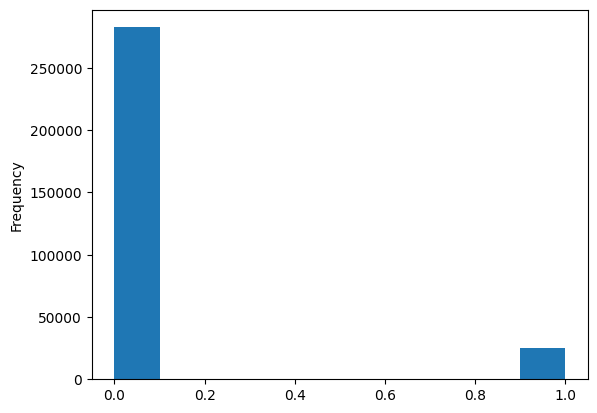

In [8]:
train_dat['TARGET'].astype(int).plot.hist();

In [9]:
# Total na
mis_val = train_dat.isnull().sum()
        
# Percentage
mis_val_percent = 100 * train_dat.isnull().sum() / len(train_dat)
        
# tbl_result
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
mis_val_table = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table[mis_val_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [10]:
train_dat.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
#categorical
train_dat.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [12]:
#Encoding Categorical Variables
#Label Encoding and One-Hot Encoding

#encoder obj
le = LabelEncoder()
le_count = 0

for col in train_dat:
    if train_dat[col].dtype == 'object':
        if len(list(train_dat[col].unique())) <= 2:
            #Train training data
            le.fit(train_dat[col])
            #Transform
            train_dat[col] = le.transform(train_dat[col])
            test_dat[col] = le.transform(test_dat[col])
            
            #track label
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [13]:
#one-hot encoding
train_dat = pd.get_dummies(train_dat)
test_dat = pd.get_dummies(test_dat)

print('Training Features shape: ', train_dat.shape)
print('Testing Features shape: ', test_dat.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [14]:
pd.set_option('display.max_rows', None)
train_dat.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.095213,0.340108,0.693673,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,...,0.003941,0.030090,0.007466,0.005785,0.005284,0.214757,0.210773,0.017437,0.518446,0.007570
std,102790.175348,0.272419,0.293509,0.473746,0.460968,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,...,0.062656,0.170835,0.086085,0.075840,0.072501,0.410654,0.407858,0.130892,0.499660,0.086679
min,100002.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,367142.500000,0.000000,0.000000,1.000000,1.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,456255.000000,1.000000,1.000000,1.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Angka di kolom DAYS_BIRTH adalah negatif karena dicatat relatif terhadap aplikasi pinjaman saat ini. Untuk melihat statistik ini dalam beberapa tahun, kita dapat membaginya dengan -1 dan membaginya dengan jumlah hari dalam setahun:

In [15]:
(train_dat['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Tidak ada outlier untuk usia baik di high atau low end. bagaimana days_employed, kalau dilihat data desc() sebelumnya terlihat negatif juga

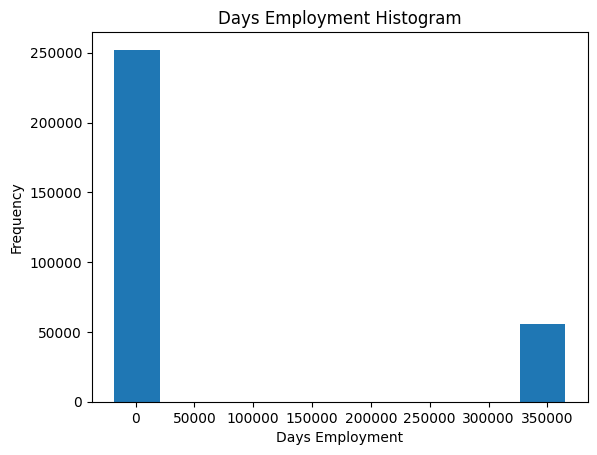

In [16]:
train_dat['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [17]:
#progressive check
anom = train_dat[train_dat['DAYS_EMPLOYED'] == 365243]
non_anom = train_dat[train_dat['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


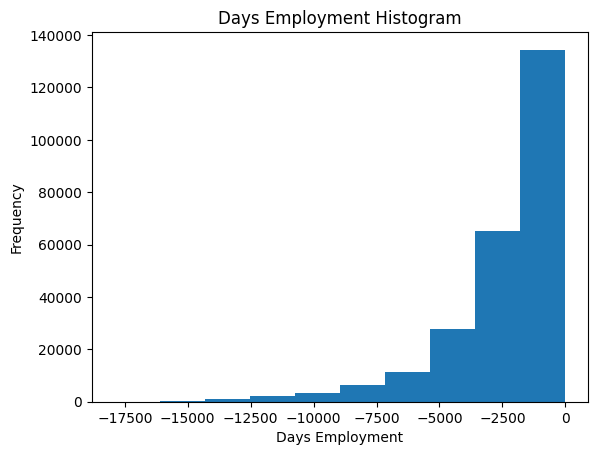

In [18]:
'''karena semua anomali memiliki nilai yang persis sama, 
maka mengisinya dengan nilai yang sama jika semua pinjaman ini memiliki kesamaan.
mengisi nilai anomali dengan bukan angka (np.nan) 
lalu membuat kolom boolean baru yang menunjukkan apakah nilainya anomali atau tidak.'''

#flag
train_dat['DAYS_EMPLOYED_ANOM'] = train_dat["DAYS_EMPLOYED"] == 365243
#replace
train_dat['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
train_dat['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');


note:
apa pun yang kita lakukan pada data pelatihan juga harus kita lakukan pada data pengujian.

In [19]:
test_dat['DAYS_EMPLOYED_ANOM'] = test_dat["DAYS_EMPLOYED"] == 365243
test_dat["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (test_dat["DAYS_EMPLOYED_ANOM"].sum(), len(test_dat)))

There are 9274 anomalies in the test data out of 48744 entries


Koefisien korelasi bukanlah metode terbaik untuk merepresentasikan "relevansi" suatu fitur, tetapi ini memberi kita gambaran tentang kemungkinan hubungan di dalam data. 
Beberapa interpretasi umum dari nilai absolut koefisien korelasi adalah: 
* .00-.19 “sangat lemah” 
* .20-.39 “lemah” 
* .40-.59 “sedang” 
* .60-.79 “kuat” 
* .80-1.0 "sangat kuat"

In [20]:
correlations = train_dat.corr()['TARGET'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

Mari kita lihat beberapa korelasi yang lebih signifikan: DAYS_BIRTH adalah korelasi yang paling positif. (kecuali untuk TARGET karena korelasi variabel dengan dirinya sendiri selalu 1!) Melihat dokumentasi, DAYS_BIRTH adalah usia klien dalam hari pada saat pinjaman di hari negatif (untuk alasan apapun!). Korelasinya positif, tetapi nilai fitur ini sebenarnya negatif, yang berarti bahwa seiring bertambahnya usia klien, mereka cenderung gagal membayar pinjaman mereka (yaitu target == 0). Itu sedikit membingungkan, jadi kami akan mengambil nilai absolut dari fitur tersebut dan korelasinya akan menjadi negatif

In [21]:
#Effect of Age pada Repayment
train_dat['DAYS_BIRTH'] = abs(train_dat['DAYS_BIRTH'])
train_dat['DAYS_BIRTH'].corr(train_dat['TARGET'])

-0.07823930830982694


Seiring bertambahnya usia nasabah, terdapat hubungan linier negatif dengan target yang berarti bahwa seiring bertambahnya usia nasabah, mereka cenderung lebih sering melunasi pinjamannya tepat waktu.

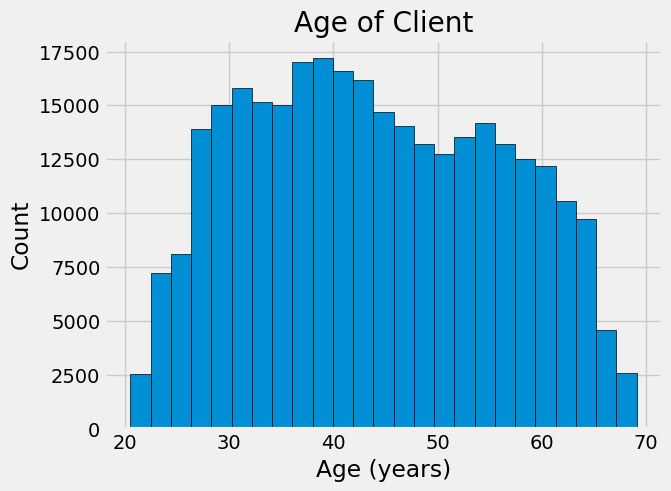

In [23]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(train_dat['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

Dengan sendirinya, distribusi usia tidak banyak memberi tahu kita selain tidak ada outlier karena semua usia masuk akal. Untuk memvisualisasikan efek usia pada target, selanjutnya kita akan membuat [plot perkiraan kepadatan kernel](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE) yang diwarnai dengan nilai target.

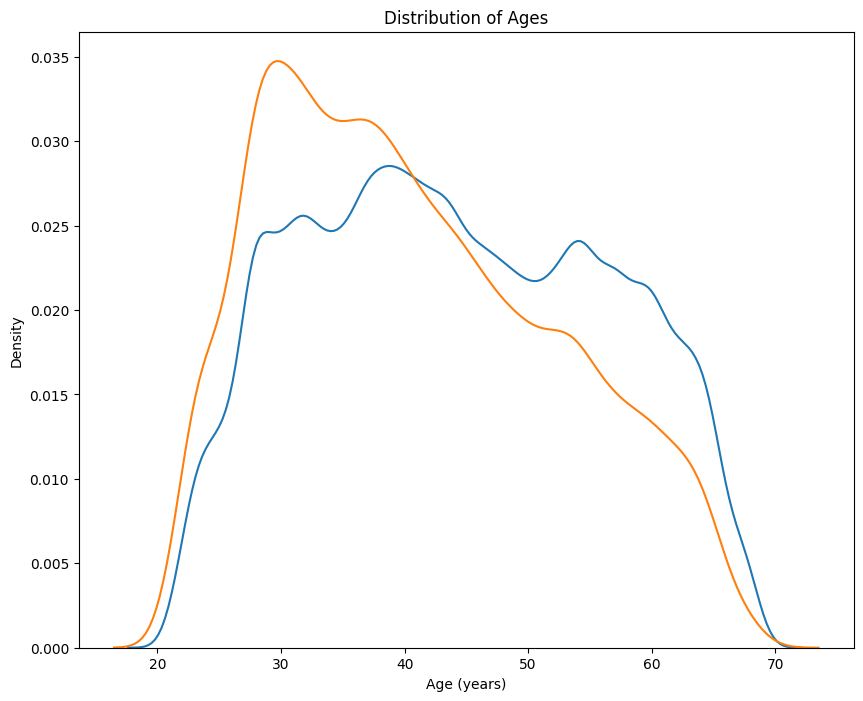

In [22]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_dat.loc[train_dat['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train_dat.loc[train_dat['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

Kurva target == 1 condong ke ujung rentang yang lebih muda. Meskipun ini bukan korelasi yang signifikan (koefisien korelasi -0,07), variabel ini kemungkinan besar akan berguna dalam model pembelajaran mesin karena memengaruhi target. Mari kita lihat hubungan ini dengan cara lain: kegagalan rata-rata untuk membayar kembali pinjaman berdasarkan kelompok usia.

Untuk membuat grafik ini, pertama-tama kita `memotong` kategori usia ke dalam kotak masing-masing 5 tahun. Kemudian, untuk setiap kotak, kami menghitung nilai rata-rata dari target, yang menunjukkan rasio pinjaman yang tidak dibayar di setiap kategori umur.

In [24]:
# Age information yang dibagi
age_data = train_dat[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [25]:
# Group and avarage
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


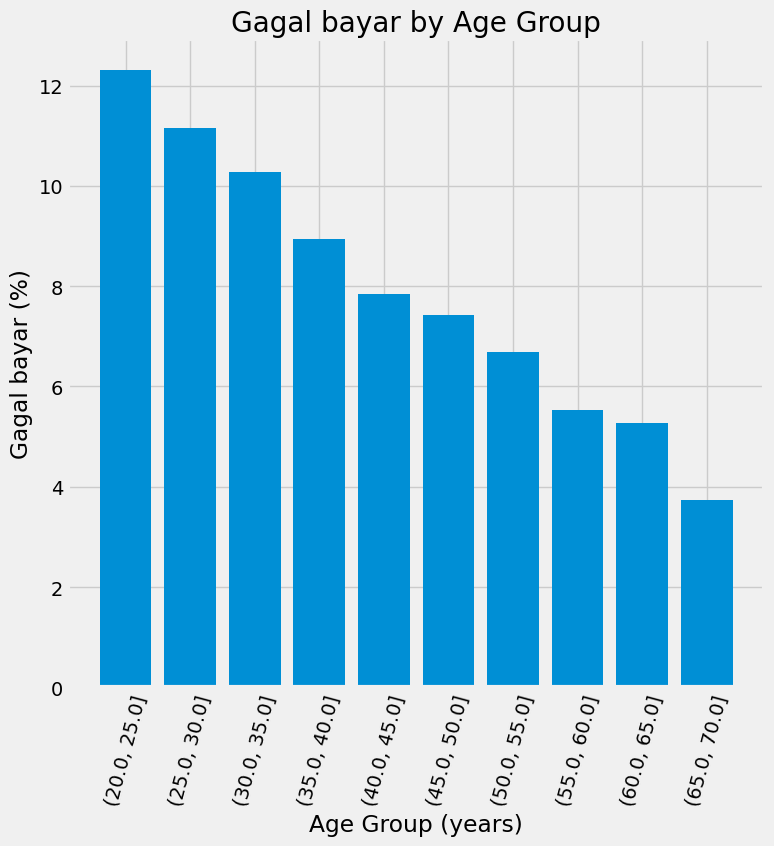

In [29]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Gagal bayar (%)')
plt.title('Gagal bayar by Age Group');

Ada tren yang jelas: pelamar yang lebih muda cenderung tidak membayar kembali pinjamannya! Tingkat kegagalan membayar di atas 10% untuk tiga kelompok umur termuda dan di bawah 5% untuk kelompok umur tertua.

Ini adalah informasi yang dapat langsung digunakan oleh bank: karena klien yang lebih muda cenderung tidak dapat melunasi pinjaman, mungkin mereka harus diberi lebih banyak panduan atau tip perencanaan keuangan. Ini tidak berarti bank harus mendiskriminasi nasabah yang lebih muda, tetapi akan bijaksana untuk mengambil tindakan pencegahan untuk membantu nasabah yang lebih muda membayar tepat waktu.

### Exterior Sources

3 variabel dengan korelasi negatif terkuat dengan target adalah `EXT_SOURCE_1`, `EXT_SOURCE_2`, dan `EXT_SOURCE_3`.
Menurut dokumentasi, fitur ini mewakili "skor yang dinormalisasi dari sumber data eksternal". Saya tidak yakin apa artinya ini sebenarnya, tetapi ini mungkin semacam peringkat kredit kumulatif yang dibuat menggunakan berbagai sumber data.

Mari kita lihat variabel-variabel ini.

Pertama, kita dapat menunjukkan korelasi fitur `EXT_SOURCE` dengan target dan satu sama lain.

In [27]:
# EXT_SOURCE correlations
ext_data = train_dat[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


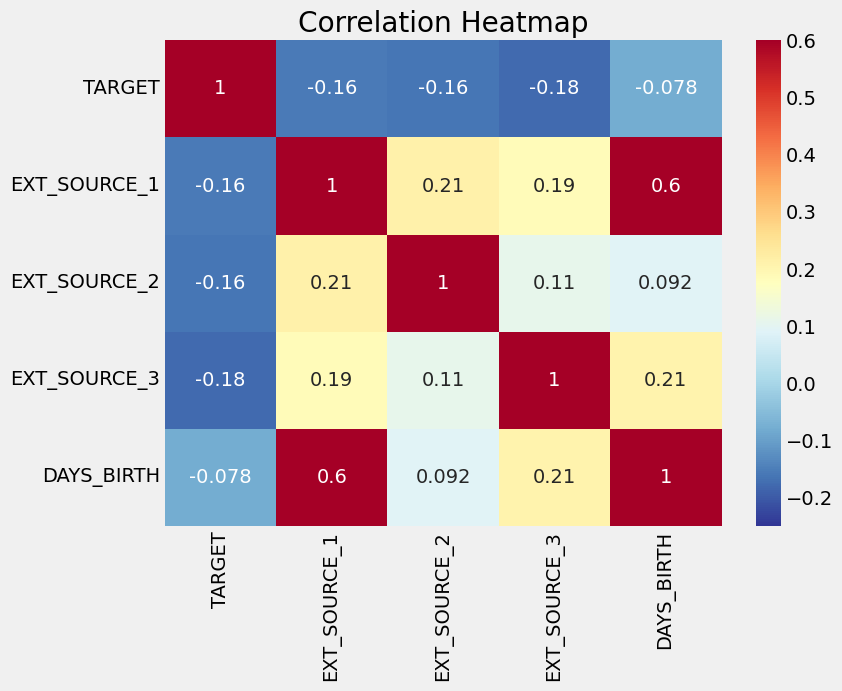

In [28]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Ketiga fitur `EXT_SOURCE` memiliki korelasi negatif dengan target, yang menunjukkan bahwa seiring dengan peningkatan nilai `EXT_SOURCE`, klien cenderung akan melunasi pinjaman. Kita juga dapat melihat bahwa `DAYS_BIRTH` berkorelasi positif dengan `EXT_SOURCE_1` yang menunjukkan bahwa mungkin salah satu faktor dalam skor ini adalah usia klien.

Selanjutnya kita bisa melihat sebaran masing-masing fitur tersebut diwarnai dengan nilai target. Ini akan membiarkan kita memvisualisasikan efek dari variabel ini pada target.

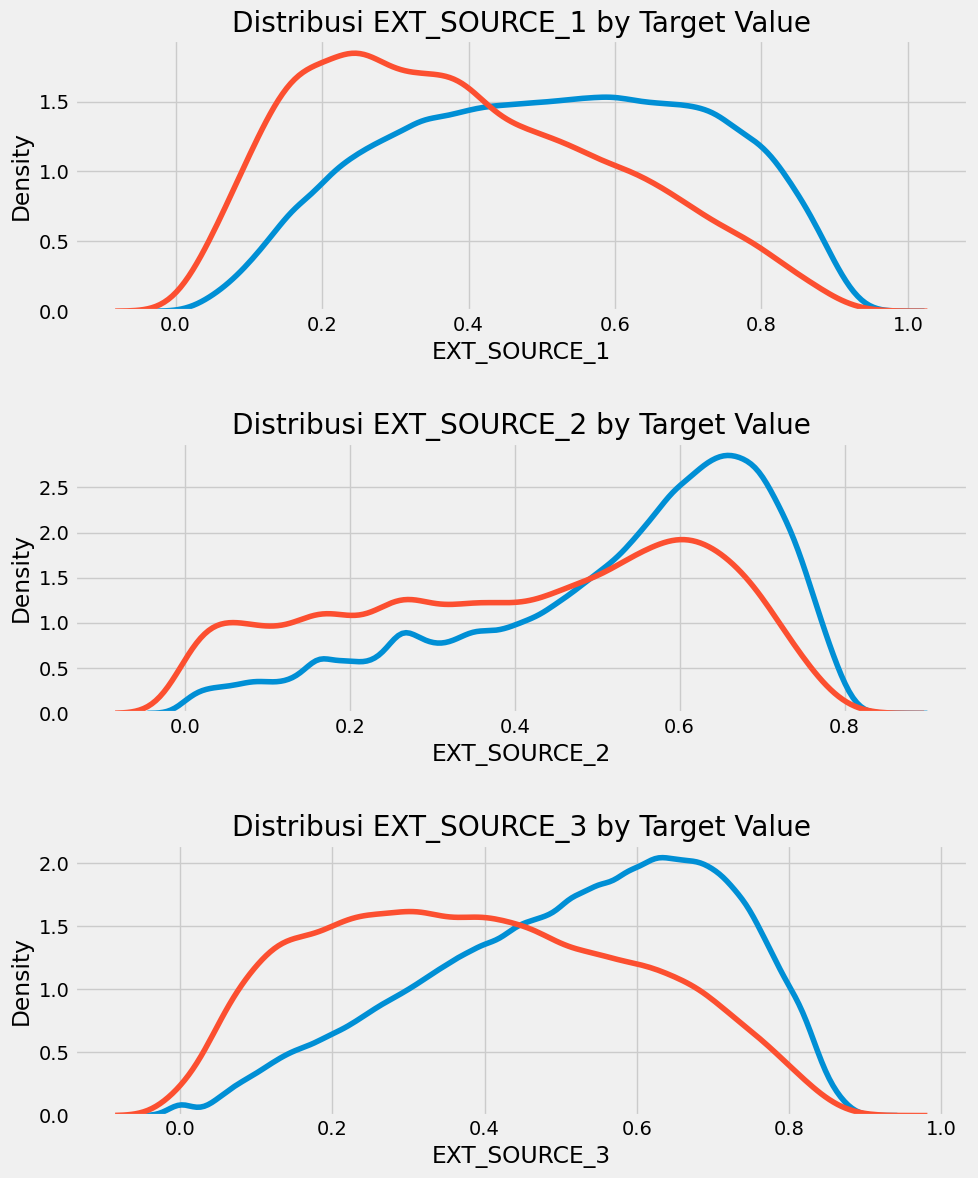

In [31]:
plt.figure(figsize = (10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(train_dat.loc[train_dat['TARGET'] == 0, source], label = 'target == 0')
    # plot loans yang not repaid
    sns.kdeplot(train_dat.loc[train_dat['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribusi %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)
    

`EXT_SOURCE_3` menampilkan perbedaan terbesar antara nilai target. Kami dapat dengan jelas melihat bahwa fitur ini memiliki beberapa hubungan dengan kemungkinan pemohon membayar kembali pinjaman. Hubungannya tidak terlalu kuat (sebenarnya semuanya [dianggap sangat lemah](http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf), tetapi variabel ini akan tetap berguna untuk pembelajaran mesin model untuk memprediksi apakah atau tidak pemohon akan membayar kembali pinjaman tepat waktu.

Cek Duplicate

In [34]:
columns_without_id = [col for col in train_dat.columns if col!='SK_ID_CURR']
#Checking for duplicates in the data.
train_dat[train_dat.duplicated(subset = columns_without_id, keep=False)]
print('The no of duplicates in the data:',train_dat[train_dat.duplicated(subset = columns_without_id, keep=False)]
      .shape[0])

The no of duplicates in the data: 0


In [36]:
#cek imbalance
train_dat['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

> Non-numerical feature engineering

In [38]:
#List of non-numerical variables
train_dat.select_dtypes(include=['O']).columns

Index([], dtype='object')

In [40]:
train_dat['FLAG_OWN_CAR'] = train_dat['FLAG_OWN_CAR'].map( {'Y':1, 'N':0})
train_dat['FLAG_OWN_REALTY'] = train_dat['FLAG_OWN_REALTY'].map( {'Y':1, 'N':0})

test_dat['FLAG_OWN_CAR'] = test_dat['FLAG_OWN_CAR'].map( {'Y':1, 'N':0})
test_dat['FLAG_OWN_REALTY'] = test_dat['FLAG_OWN_REALTY'].map( {'Y':1, 'N':0})
print(train_dat.shape)
print(test_dat.shape)

(307511, 244)
(48744, 240)


In [41]:
train_dat.columns.difference(test_dat.columns)


Index(['CODE_GENDER_XNA', 'NAME_FAMILY_STATUS_Unknown',
       'NAME_INCOME_TYPE_Maternity leave', 'TARGET'],
      dtype='object')

Untuk menghapus kolom di data pelatihan yang tidak ada di data pengujian, kita perlu menyelaraskan kerangka data. Pertama kita mengekstrak kolom target dari data pelatihan (karena ini tidak ada dalam data pengujian tetapi kita perlu menyimpan informasi ini). Saat kita melakukan penyelarasan, kita harus memastikan untuk menyetel sumbu = 1 untuk menyelaraskan kerangka data

In [42]:
#Aligning Training and Testing Data

train_labels = train_dat['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
train_dat, test_dat = train_dat.align(test_dat, join = 'inner', axis = 1)

# Add the target back in
train_dat['TARGET'] = train_labels

print('Training Features shape: ', train_dat.shape)
print('Testing Features shape: ', test_dat.shape)

Training Features shape:  (307511, 241)
Testing Features shape:  (48744, 240)


Dataset pelatihan dan pengujian sekarang memiliki fitur yang sama yang diperlukan untuk pembelajaran mesin. Jumlah fitur telah berkembang secara signifikan karena penyandian satu-panas. Pada titik tertentu kita mungkin ingin mencoba pengurangan dimensi (menghapus fitur yang tidak relevan) untuk mengurangi ukuran kumpulan data.

> Menangani nilai yang hilang (menggunakan Iterative Imputer) sebelum deteksi outlier

Kita perlu menangani nilai yang hilang sebelum kita dapat melakukan deteksi outlier apa pun. Ada banyak cara untuk menangani nilai yang hilang. Kita dapat menggunakan fillna() dan mengganti nilai yang hilang dengan rata-rata data, median, atau nilai paling sering. Pendekatan yang akan kita gunakan di bawah ini adalah Iterative Imputer. Iterative imputer akan menganggap variabel yang hilang sebagai variabel dependen dan semua fitur lainnya akan menjadi variabel independen. Jadi akan ada regresi dan variabel independen akan digunakan untuk menentukan variabel dependen (yang merupakan fitur yang hilang).

In [47]:
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
import random

In [43]:
y=train_dat[['SK_ID_CURR','TARGET']]
X=train_dat.drop(columns=['TARGET'], axis=1)
X.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002,0,NaN,NaN,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,1,0,1,0,False
1,100003,0,NaN,NaN,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,1,0,0,0,0,0,0,1,0,False
2,100004,1,NaN,NaN,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,NaN,NaN,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,NaN,NaN,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,False


In [44]:
X_imputation = X.loc[:, (X.nunique() > 1000)]

In [45]:
X_imputation.columns

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'COMMONAREA_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG',
       'BASEMENTAREA_MODE', 'COMMONAREA_MODE', 'LANDAREA_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'COMMONAREA_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI',
       'TOTALAREA_MODE', 'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [48]:
imputer = IterativeImputer(BayesianRidge())
imputed_total = pd.DataFrame(imputer.fit_transform(X_imputation))
imputed_total.columns = X_imputation.columns